## Генератор траекторий Геометрического Винеровского процесса

Геометрический Винеровский процесс (далее GBM) - случ. процесс, в котором логарифм случайной величины (сечения) ведёт себя как обычное Броуновское движение (т.е. является Винеровским процессом)


Вывод решения опирается на Лемму Ито, полный вывод можно [найти здесь](https://www.quantstart.com/articles/Geometric-Brownian-Motion/). Он согласется с [формулой из Википедии](https://en.wikipedia.org/wiki/Geometric_Brownian_motion)

Для генерации Винеровского процесса (Броуновского движения) воспользуемся теоремой о том, что оно приближается случайными блужданиями:
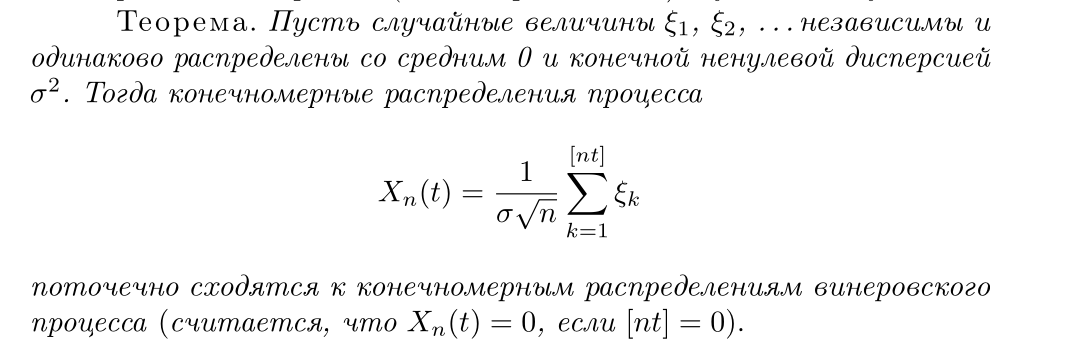

Случайные величины $\xi_i$ будем брать из $\mathcal{N}{(0, 1)}$, потому что эмпирически шум в большинстве случаев нормален.

В классе броуновского движения сначала реализуем Винеровский процесс, потом воспользуемся им для реализации GBM.

In [28]:
import numpy as np
import plotly.express as px
import pandas as pd
import scipy.stats as sps

In [22]:
class BrownianMotion:

    def __init__(self, drift = 1, var = 1, scale = 1, iters = 1000):
        self.drift_rate = drift # кф-т дрейфа (кф-т сноса стох. процесса)
        self.variance_rate = var # кф-т диффузии (дисперсия)
        self.random_walk_scale = scale # стандартное отклонение для случ. блужданий
        self.n_iter = iters # количество случ. величин для генерации Броуновского движения

    def random_walk(self, t):
        n_steps = round(self.n_iter * t)
        W = np.ones(n_steps)
        for iter in range(1, n_steps):
            ksi_i = sps.norm.rvs(loc = 0, scale = self.random_walk_scale)
            W[iter] = W[iter - 1] + ksi_i / (self.random_walk_scale * np.sqrt(self.n_iter))

        return W

    def geometric_brownian_motion(self, S_0, t):
        '''
        Ф-я возвращает аналит. формулу для геом. винеровского процесса
        '''
        return S_0 * np.exp((self.drift_rate - self.variance_rate ** 2 * 0.5) * t + self.variance_rate * self.random_walk(t))

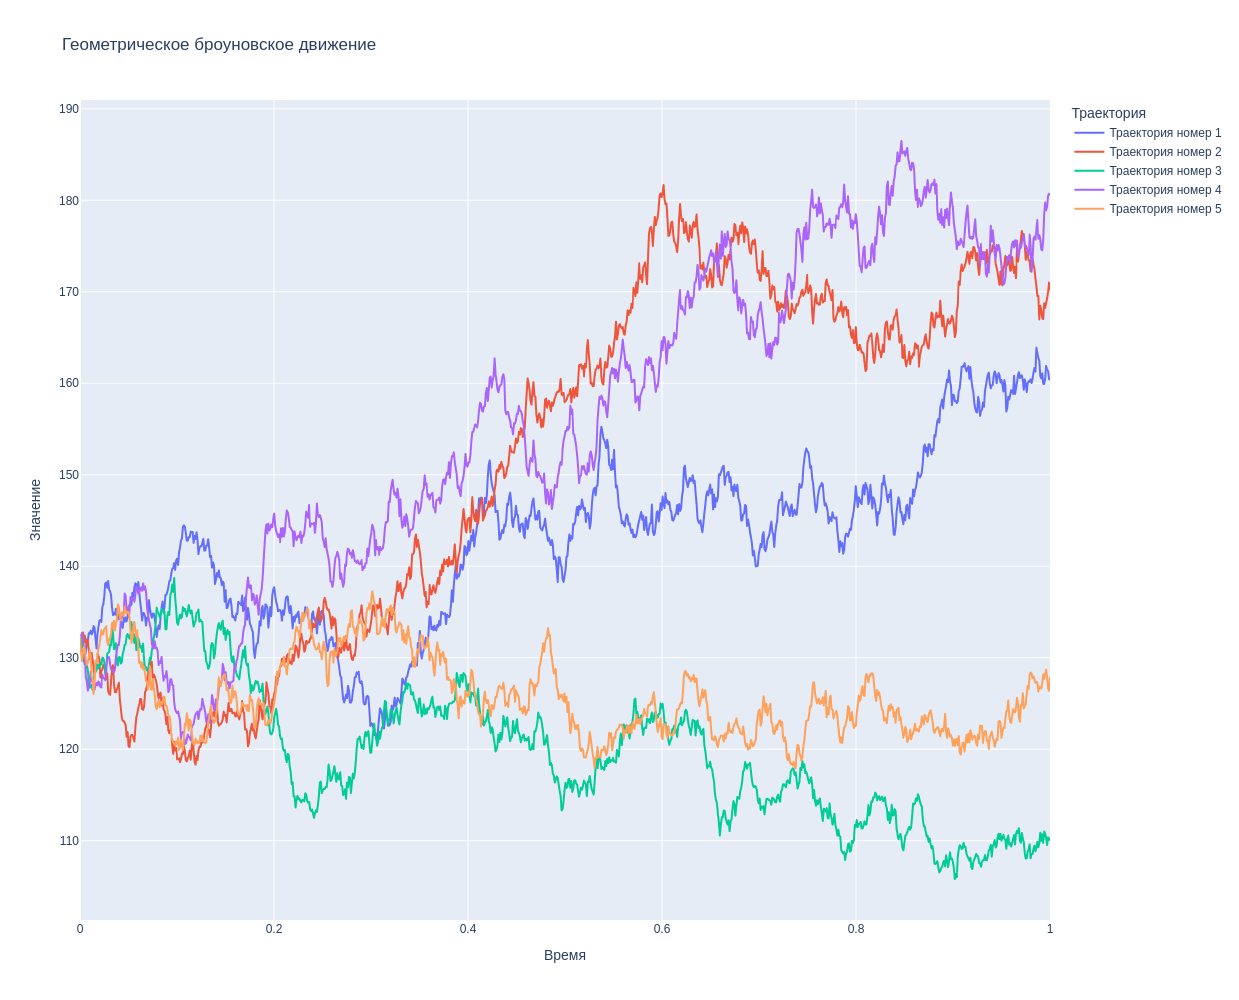

In [34]:
bm = BrownianMotion(drift = 0.1, var = 0.2, scale = 1, iters = 1000)

S_0 = 100
T = 1
num_paths = 5 # кол-во траекторий

t = np.linspace(0, T, bm.n_iter)

trajectories = np.array([bm.geometric_brownian_motion(S_0, T) for _ in range(num_paths)])

df = pd.DataFrame(trajectories.T, columns = [f'Траектория номер {i+1}' for i in range(num_paths)])
df['Время'] = t
df_melted = df.melt(id_vars = ['Время'], var_name = 'Траектория', value_name = 'Значение')

fig1 = px.line(df_melted, x = 'Время', y = 'Значение', color = 'Траектория',
               title = 'Геометрическое броуновское движение')
fig1.update_layout(height = 1000, width = 1200)
fig1.show()